#  Request event metadata


In [17]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

## A list of FDSN web service providers

- [FDSN web service client for ObsPy](https://docs.obspy.org/packages/obspy.clients.fdsn.html#basic-fdsn-client-usage)
- [Data Centers Supporting FDSN Web Services](https://www.fdsn.org/webservices/datacenters/)

In [18]:
from obspy.clients.fdsn.header import URL_MAPPINGS

for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))

BGR         http://eida.bgr.de
EMSC        http://www.seismicportal.eu
ETH         http://eida.ethz.ch
GEONET      http://service.geonet.org.nz
GFZ         http://geofon.gfz-potsdam.de
ICGC        http://ws.icgc.cat
INGV        http://webservices.ingv.it
IPGP        http://ws.ipgp.fr
IRIS        http://service.iris.edu
ISC         http://isc-mirror.iris.washington.edu
KNMI        http://rdsa.knmi.nl
KOERI       http://eida.koeri.boun.edu.tr
LMU         http://erde.geophysik.uni-muenchen.de
NCEDC       http://service.ncedc.org
NIEP        http://eida-sc3.infp.ro
NOA         http://eida.gein.noa.gr
ODC         http://www.orfeus-eu.org
ORFEUS      http://www.orfeus-eu.org
RASPISHAKE  http://fdsnws.raspberryshakedata.com
RESIF       http://ws.resif.fr
SCEDC       http://service.scedc.caltech.edu
TEXNET      http://rtserve.beg.utexas.edu
UIB-NORSAR  http://eida.geo.uib.no
USGS        http://earthquake.usgs.gov
USP         http://sismo.iag.usp.br


## FDSN Event Web Service

In this example, we uses USGS FDSN Event Web Service to download [USGS ANSS ComCat](https://earthquake.usgs.gov/data/comcat/) (an earthquake catalog).

In [19]:
# specify webservice
client = Client("USGS")

### Query event

Use [Query the event service](https://docs.obspy.org/master/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html) of the client.

The return value is a [Catalog](https://docs.obspy.org/master/packages/autogen/obspy.core.event.Catalog.html) object which can contain any number of events.

![Catalog](../images/Catalog.png)

In [20]:
# request event metadata with the following criterion:
# origin time: between start and end time
# location: within a box region
# depth: between min and max depths
# magnitude: between min and mag magnitudes
catalog = client.get_events(starttime=UTCDateTime("2019-07-01T00:00:00.000"), endtime=UTCDateTime("2019-07-11T00:00:00.000"),
                            minlatitude=35.5, maxlatitude=36, minlongitude=-118, maxlongitude=-117.3,
                            mindepth=0.0, maxdepth=100.0,
                            minmagnitude=5, maxmagnitude=10.0)

print("A total of {} events~".format(catalog.count()))

A total of 5 events~


### Process the Catalog object

Check the methods of a [Catalog](https://docs.obspy.org/master/packages/autogen/obspy.core.event.Catalog.html) object.

Use [plot](https://docs.obspy.org/master/packages/autogen/obspy.core.event.Catalog.plot.html) method to check event distribution. 

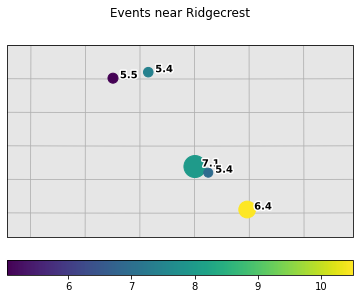

In [21]:
# plot event distribution
catalog.plot(projection="local", title="Events near Ridgecrest");

Use [write](https://docs.obspy.org/master/packages/autogen/obspy.core.event.Catalog.write.html) method to output the event metadata. 

In [22]:
# write to a QUAKEML file
catalog.write("events.xml", format="QUAKEML")

We can also output event metadata in custom fomats.

In this example, a [csv file](https://en.wikipedia.org/wiki/Comma-separated_values) is generated in our own way and it can be used in [SOD](http://www.seis.sc.edu/sod/ingredients/CSVEventSource.html). You can also use python [csv](https://docs.python.org/3/library/csv.html) module.

In [23]:
# write to a text file
with open("events.csv", "w") as f:
    f.write("time, latitude, longitude, depth, depthUnits, magnitude, magnitudeType\n")
    for ev in catalog:
        origin = ev.preferred_origin().time
        lon = ev.preferred_origin().longitude
        lat = ev.preferred_origin().latitude
        depth = ev.preferred_origin().depth / 1000.0  # convert to KILOMETER
        evmg = ev.preferred_magnitude().mag
        evmg_type = ev.preferred_magnitude().magnitude_type
        f.write("{}Z, {:.5f}, {:.5f}, {:6.2f}, {}, {:5}, {}\n".format(origin.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3], lat, lon, depth, "KILOMETER", evmg, evmg_type))